In [2]:
#import required libraries
import cv2
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
img_arr = cv2.imread("train/closed_eyes/first.png", cv2.IMREAD_GRAYSCALE)

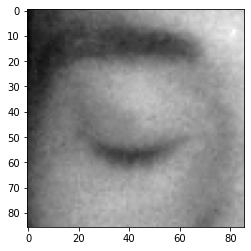

In [4]:
plt.imshow(img_arr, cmap="gray")

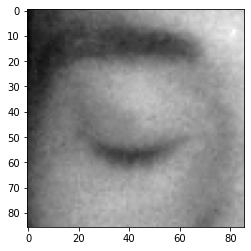

In [5]:
#traning dataset
Datadirectory = "train/"
Classes = ["closed_eyes", "open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break

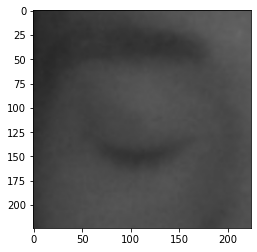

In [6]:
img_size = 224
new_arr = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_arr, cmap="gray")

In [7]:
#reading all the images 
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
                new_arr = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_arr,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

4000


In [10]:
#avoid overfitting
import random
random.shuffle(training_Data) 

In [11]:
#splitting into data and labels
x = []
y = []
for features,lable in training_Data:
    x.append(features)
    y.append(lable)
x = np.array(x).reshape(-1,img_size, img_size, 3)    
x.shape
(2000, 224, 224, 3)

(2000, 224, 224, 3)

In [12]:
#normalize the data
x = x/255.0;
y = np.array(y)
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Deep learning model for training

In [14]:
model = tf.keras.applications.mobilenet.MobileNet()

In [15]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Transfer Learning

In [16]:
base_input = model.layers[0].input

In [17]:
base_output = model.layers[-4].output

In [18]:
layer = layers.Flatten()(base_output)
final = layers.Dense(1)(layer)
final_output = layers.Activation('sigmoid')(final)

In [19]:
new_model = keras.Model(inputs = base_input, outputs = final)

In [21]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Binary classification

In [22]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [23]:
new_model. fit(x, y, epochs = 3, batch_size = 20)

Epoch 1/3
200/200 [==============================] - 1159s 6s/step - loss: 1.4087 - accuracy: 0.9043
Epoch 2/3
200/200 [==============================] - 1202s 6s/step - loss: 0.4053 - accuracy: 0.9718
Epoch 3/3
200/200 [==============================] - 1204s 6s/step - loss: 1.2444 - accuracy: 0.9175


In [24]:
accuracy = new_model.evaluate(x ,y)

125/125 [==============================] - 207s 2s/step - loss: 3.2115 - accuracy: 0.7887


In [25]:
print(accuracy)

[3.2114779949188232, 0.7887499928474426]


In [26]:
new_model.save('my_driver.h5')

In [27]:
img_arr = cv2.imread("train/Open_Eyes/s0001_02358_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
new_arr = cv2.resize(backtorgb, (img_size,img_size))

In [28]:
x_input = np.array(new_arr).reshape(1, img_size, img_size, 3)

In [29]:
x_input.shape

(1, 224, 224, 3)

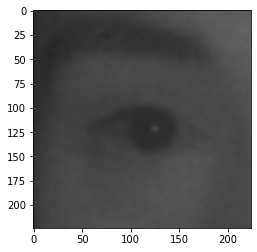

In [30]:
plt.imshow(new_arr)

In [31]:
x_input = x_input/255.0

In [32]:
prediction = new_model.predict(x_input)

In [33]:
prediction

array([[-12.884157]], dtype=float32)

# check for unknown images

In [34]:
img = cv2.imread('unknown.jpg')

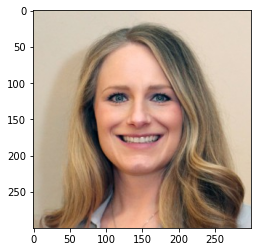

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [44]:
eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [45]:
for(x, y, w, h) in eye:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

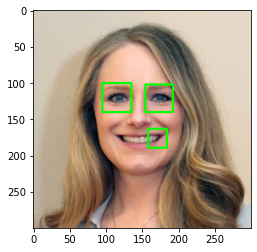

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [47]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eye:
    ro_gray = gray[y:y+h, x:x+w]
    ro_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(ro_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_ro = ro_color[ey:ey+eh, ex:ex+ew]

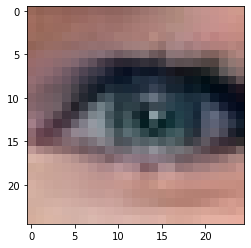

In [48]:
plt.imshow(cv2.cvtColor(eyes_ro, cv2.COLOR_BGR2RGB))

In [49]:
eyes_ro.shape

(25, 25, 3)

In [50]:
final_image = cv2.resize(eyes_ro, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [51]:
final_image.shape

(1, 224, 224, 3)

In [52]:
new_model.predict(final_image)

array([[4.6729236]], dtype=float32)

In [ ]:
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eye  = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eye:
        ro_gray = gray[y:y+h, x:x+w]
        ro_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(ro_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for(ex, ey, ew, eh) in eyess:
                eyes_ro = ro_color[ey:ey+eh, ex:ex+ew]
            
    final_image = cv2.resize(eyes_ro, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions > 0):
        status = "Open eyes"
    else:
        status = "Closed eyes"
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w ,y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    
    
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()
        

False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detecte

False
False
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
Eyes are not detected
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Ey

False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
False
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
Fa

False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
Eyes are not

False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detecte

Eyes are not detected
Eyes are not detected
False
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
Eyes are not detected
False
False
False
Eyes are not detected


False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
Eyes are not detected
False
False
False
Eyes are not detected
False
False
False
False
Eyes are not detected
False
False
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected


False
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
False
False
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
Eyes are not detected
False
Eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals